## Horse racing result prediction is on the historical performance of each horse

In [7]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential        
from tensorflow.keras.layers import Dense             
from tensorflow.keras.callbacks import EarlyStopping  # To stop training early if val loss stops decreasing
from tensorflow.keras import initializers

In [8]:
# results.csv contains thrree seasons (2018-2019, 2019-2020 and 2020-2010) of horse racing restuls
# Note that, each season is from Sep until July of next year 
# e.g. season 2018-2019 is from Sep 2018 to July 2019
df=pd.read_csv('results.csv')

In [10]:
df.head(3)

,r_season,r_date,r_index,r_course,r_class,r_distance,r_tract,r_race_no,r_horse_no,r_brand_no,r_horse_age,r_jockey,r_draw,r_rating,r_trainer,r_LBW,r_finish_order,r_label
0,1819,2018-09-02,1,ST,4,1000,B,1,3,B294,4,Purton,1,57,Gibson,0.75,2,2
1,1819,2018-09-02,1,ST,4,1000,B,1,1,A323,4,CWong,10,59,Millard,3.25,6,6
2,1819,2018-09-02,1,ST,4,1000,B,1,10,B231,4,Mo,6,42,Tsui,5.5,8,8


In [11]:
df.columns

Index(['r_season', 'r_date', 'r_index', 'r_course', 'r_class', 'r_distance',
       'r_tract', 'r_race_no', 'r_horse_no', 'r_brand_no', 'r_horse_age',
       'r_jockey', 'r_draw', 'r_rating', 'r_trainer', 'r_LBW',
       'r_finish_order', 'r_label'],
      dtype='object')

##  EDA - Draws, Trainers and  Jockeys

### EDA - Draw 

In [12]:
# draw_stas.csv is created based on results.csv (df), 
# which contains winning percentage of each draw (by racing course, tract, distance)
df_ds=pd.read_csv('draw_stat.csv')

In [13]:
df_ds.head(3)

,ds_course,ds_tract,ds_distance,ds_type,ds_D01,ds_D01_pct,ds_D02,ds_D02_pct,ds_D03,ds_D03_pct,...,ds_D10,ds_D10_pct,ds_D11,ds_D11_pct,ds_D12,ds_D12_pct,ds_D13,ds_D13_pct,ds_D14,ds_D14_pct
0,ST,A,1000,1,4,13,0,0,1,3,...,4,13,1,3,2,7,1,3,5,21
1,ST,A,1200,1,16,8,18,9,11,5,...,14,8,9,5,11,6,8,5,14,10
2,ST,A,1400,1,16,8,11,5,16,8,...,13,7,14,7,8,4,14,8,12,7


In [123]:
# E.g. to select racing course 'HV', racing tract 'B' and racing distaince '1200'
s_course='ST'      # racing course ('HV' or 'ST')
s_tract='B'        # racing tract
s_distance=1400    # racing distance
df_ds_tar = df_ds[(df_ds['ds_course'] == s_course ) & (df_ds['ds_tract'] == s_tract) 
                  & (df_ds['ds_distance']==s_distance)]
df_ds_tar.columns


Index(['ds_course', 'ds_tract', 'ds_distance', 'ds_type', 'ds_D01',
       'ds_D01_pct', 'ds_D02', 'ds_D02_pct', 'ds_D03', 'ds_D03_pct', 'ds_D04',
       'ds_D04_pct', 'ds_D05', 'ds_D05_pct', 'ds_D06', 'ds_D06_pct', 'ds_D07',
       'ds_D07_pct', 'ds_D08', 'ds_D08_pct', 'ds_D09', 'ds_D09_pct', 'ds_D10',
       'ds_D10_pct', 'ds_D11', 'ds_D11_pct', 'ds_D12', 'ds_D12_pct', 'ds_D13',
       'ds_D13_pct', 'ds_D14', 'ds_D14_pct'],
      dtype='object')

In [125]:
# Note that there are only 12 draws in racing couse 'HV' (Happy Vally)
# So, ignore draw 13 (ds_D13_pct) and draw 14 (ds_D14_pct) if generate a draw winning performace

df_ds_plt= df_ds_tar[['ds_D01_pct','ds_D02_pct','ds_D03_pct','ds_D04_pct','ds_D05_pct','ds_D06_pct',
           'ds_D07_pct','ds_D08_pct','ds_D09_pct','ds_D10_pct','ds_D11_pct','ds_D12_pct'
           #           ]] 
           ,'ds_D13_pct','ds_D14_pct']]

In [126]:
print(df_ds_plt.columns)
print(df_ds_plt.values)

Index(['ds_D01_pct', 'ds_D02_pct', 'ds_D03_pct', 'ds_D04_pct', 'ds_D05_pct',
       'ds_D06_pct', 'ds_D07_pct', 'ds_D08_pct', 'ds_D09_pct', 'ds_D10_pct',
       'ds_D11_pct', 'ds_D12_pct', 'ds_D13_pct', 'ds_D14_pct'],
      dtype='object')
[[ 8  7  4  6  8 12  9 12  5  9  3  9  6  0]]


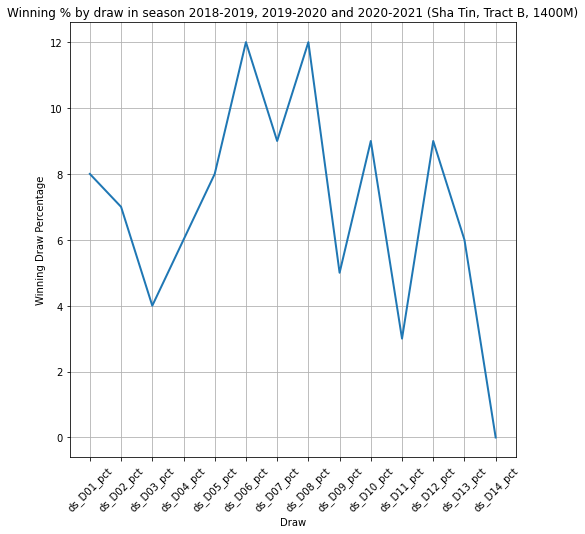

In [127]:
# Plot graph of winning percentage by draw, course, tract and distance
df_ds_pltT=df_ds_plt.T
x=df_ds_pltT.index
y=df_ds_pltT.values

plt.title("Winning % by draw in season 2018-2019, 2019-2020 and 2020-2021 (Sha Tin, Tract B, 1400M)")
plt.ylabel('Winning Draw Percentage')
plt.xlabel('Draw')
plt.rcParams["figure.figsize"]=8,8
plt.xticks(rotation=45)
plt.plot(x, y, linewidth=2)
plt.grid(True)
plt.show()

In [128]:
df_ds_pltT

,15
ds_D01_pct,8
ds_D02_pct,7
ds_D03_pct,4
ds_D04_pct,6
ds_D05_pct,8
ds_D06_pct,12
ds_D07_pct,9
ds_D08_pct,12
ds_D09_pct,5
ds_D10_pct,9


### EDA - Trainers

In [23]:
# trainer_stat.csv is created based on results.csv (df) 
# which contains winning percentage of each trainer in three seasons (2018-2019, 2019-2020 and 2020-2010)
df_ts=pd.read_csv('trainer_stat.csv')

In [108]:
df_ts

,w_trainer,w_pct
0,Size,13.28
1,Lor,11.85
2,Fownes,11.24
3,Shum,11.08
4,Lui,10.53
5,Yiu,10.02
6,Cruz,9.87
7,Hall,9.50
8,Whyte,9.28
9,Millard,9.13


df_ts.w_trainer

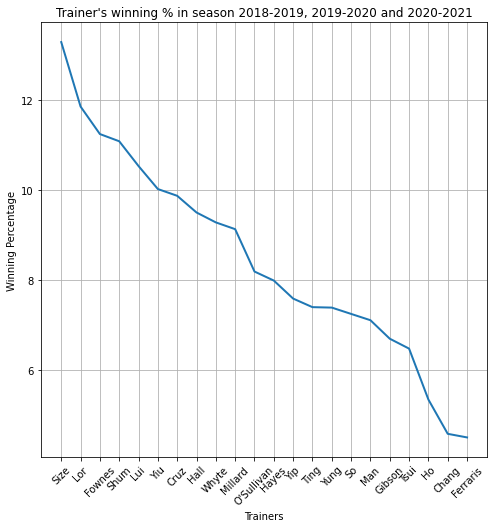

In [106]:
# Plot graph of winning percentage by each trainer based on last three seasons
x=df_ts.w_trainer
y=df_ts.w_pct

plt.title("Trainer's winning % in season 2018-2019, 2019-2020 and 2020-2021")
plt.ylabel('Winning Percentage')
plt.xlabel('Trainers')
plt.rcParams["figure.figsize"]=6,6
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(x, y, linewidth=2)
plt.show()


### EDA - Jockeys

In [32]:
# trainer_stat.csv is created based on results.csv (df) 
# which contains winning percentage of each Jockey in three seasons (2018-2019, 2019-2020 and 2020-2010)
df_js=pd.read_csv('jockey_stat.csv')

In [115]:
df_js

,w_jockey,w_pct
0,Purton,20.59
1,Moreira,19.64
2,Teetan,12.41
3,Chau,11.41
4,Ho,9.53
5,Badel,9.44
6,Schofield,7.80
7,Hamelin,5.98
8,Poon,5.86
9,Chan,5.79


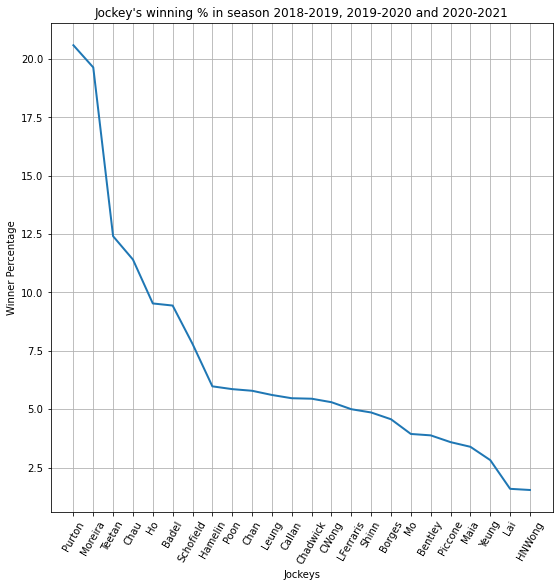

In [114]:
# Plot graph of winning percentage by each jockey based on last three seasons
x=df_js.w_jockey
y=df_js.w_pct

plt.title("Jockey's winning % in season 2018-2019, 2019-2020 and 2020-2021")
plt.ylabel('Winner Percentage')
plt.xlabel('Jockeys')
plt.rcParams["figure.figsize"]=8,8
plt.xticks(rotation=60)
plt.plot(x, y, linewidth=2)
plt.grid(True)
plt.show()

## Train and validate modle
## Use three seasons (2018-2019, 2019-2020 and  2020-2021) for training and validation

In [36]:
# results_nn.csv is created based on results.csv (df) 
# which contains winning percentage of each Jockey in three seasons (2018-2019, 2019-2020 and 2020-2010)
# However, added somes new features, see new features check df_nn.columns
df_nn=pd.read_csv('results_nn.csv')

/Users/pelecheung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
df_nn.tail(3)

,r_season,r_date,r_index,r_course,r_class,r_distance,r_tract,r_race_no,r_hors_no,r_brand_no,...,r_same_jh_1,r_same_jh_2,r_same_jh_3,r_same_jh_4,r_same_jh_x,r_same_tj_1,r_same_tj_2,r_same_tj_3,r_same_tj_4,r_same_tj_x
22273,2021,2021-07-14,835,HV,2,1200,B,9,11,E257,...,0,0,0,0,0,11.43,11.43,10.00,11.43,55.71
22274,2021,2021-07-14,835,HV,2,1200,B,9,12,C271,...,1,0,0,0,3,3.57,3.57,3.57,7.14,82.14
22275,2021,2021-07-14,835,HV,2,1200,B,9,3,C234,...,0,1,0,0,2,5.68,5.68,7.95,6.82,73.86


In [38]:
df_nn.columns

Index(['r_season', 'r_date', 'r_index', 'r_course', 'r_class', 'r_distance',
       'r_tract', 'r_race_no', 'r_hors_no', 'r_brand_no', 'r_horse_age',
       'r_jockey', 'r_draw', 'r_rating', 'r_trainer', 'r_LBW',
       'r_finish_order', 'r_label', 'r_jockey_pct', 'r_trainer_pct', 'r_ct',
       'r_course_val', 'r_lot', 'r_lot_num', 'r_lot_seq', 'r_same_cd_1',
       'r_same_cd_2', 'r_same_cd_3', 'r_same_cd_4', 'r_same_cd_x',
       'r_sea_race_ind', 'r_draw_val', 'r_same_jh_1', 'r_same_jh_2',
       'r_same_jh_3', 'r_same_jh_4', 'r_same_jh_x', 'r_same_tj_1',
       'r_same_tj_2', 'r_same_tj_3', 'r_same_tj_4', 'r_same_tj_x'],
      dtype='object')

In [39]:
# Note that, other features maybe useful, so keep it for future testing
# As of this moment, select some traget features for training and validating
df_nn_use=df_nn[['r_class',      'r_draw_val',  'r_horse_age',
                 'r_rating',     'r_jockey_pct', 'r_trainer_pct',
                 'r_same_cd_1', 'r_same_cd_2', 'r_same_cd_3',  
                 'r_same_jh_1', 'r_same_jh_2', 'r_same_jh_3', 
                 'r_same_tj_1', 'r_same_tj_2', 'r_same_tj_3',
                 'r_label']]

In [40]:
df_nn_use.tail(3)

,r_class,r_draw_val,r_horse_age,r_rating,r_jockey_pct,r_trainer_pct,r_same_cd_1,r_same_cd_2,r_same_cd_3,r_same_jh_1,r_same_jh_2,r_same_jh_3,r_same_tj_1,r_same_tj_2,r_same_tj_3,r_label
22273,2,15,3,71,12.28,10.89,0,0,0,0,0,0,11.43,11.43,10.00,11
22274,2,8,5,70,4.69,7.50,1,0,0,1,0,0,3.57,3.57,3.57,11
22275,2,7,6,87,3.46,7.14,0,0,0,0,1,0,5.68,5.68,7.95,11


In [42]:
df_nn_use.count()  ## total 22276 rows ( will use 15612 rows for training and 15611 fro validation )

r_class          22276
r_draw_val       22276
r_horse_age      22276
r_rating         22276
r_jockey_pct     22276
r_trainer_pct    22276
r_same_cd_1      22276
r_same_cd_2      22276
r_same_cd_3      22276
r_same_jh_1      22276
r_same_jh_2      22276
r_same_jh_3      22276
r_same_tj_1      22276
r_same_tj_2      22276
r_same_tj_3      22276
r_label          22276
dtype: int64

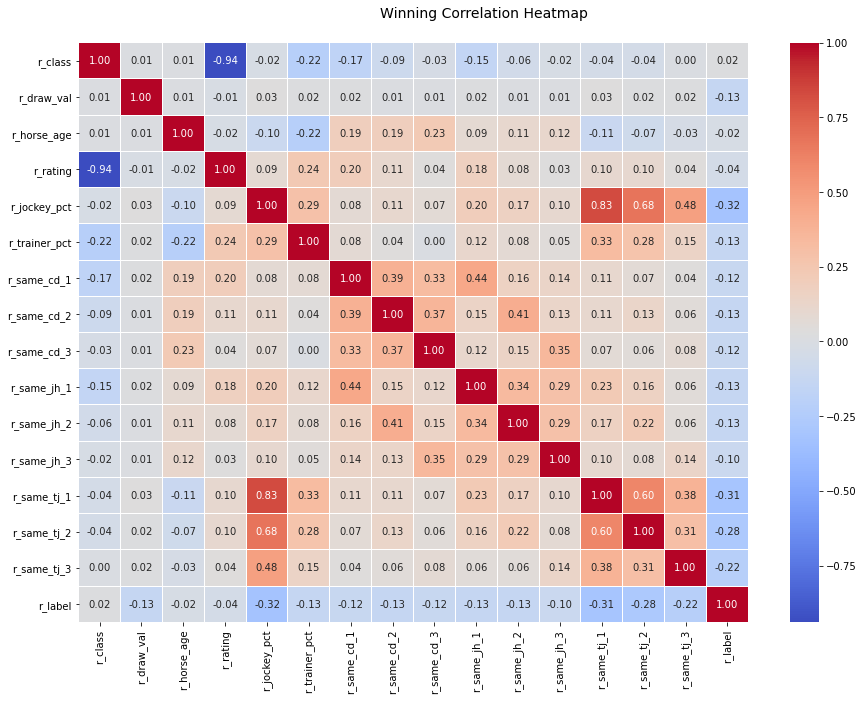

In [45]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 10))
corr = df_nn_use.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Winning Correlation Heatmap', fontsize=14)

In [46]:
# Manually split df_nn_use for test and validate
X = df_nn_use.drop(columns=['r_label'])
y = df_nn_use[['r_label']]

# Features
X_train = X[:15612]
X_val   = X[15612:]

# Labels
y_train = y[:15612]
y_val   = y[15612:]

In [50]:
# Checking for ensure manually split data is OK
X_train.tail(3)

,r_class,r_draw_val,r_horse_age,r_rating,r_jockey_pct,r_trainer_pct,r_same_cd_1,r_same_cd_2,r_same_cd_3,r_same_jh_1,r_same_jh_2,r_same_jh_3,r_same_tj_1,r_same_tj_2,r_same_tj_3
15609,3,10,4,77,5.47,4.59,0,0,0,0,0,0,1.85,5.56,11.11
15610,3,6,5,72,12.28,9.28,1,1,0,0,0,0,10.28,9.35,16.82
15611,3,4,6,62,5.50,7.14,0,0,0,0,0,0,0.00,5.56,8.33


In [49]:
# Checking for ensure manually split data is OK
X_val.head(3)

,r_class,r_draw_val,r_horse_age,r_rating,r_jockey_pct,r_trainer_pct,r_same_cd_1,r_same_cd_2,r_same_cd_3,r_same_jh_1,r_same_jh_2,r_same_jh_3,r_same_tj_1,r_same_tj_2,r_same_tj_3
15612,3,6,4,75,5.81,9.97,0,0,1,1,0,0,13.43,11.94,8.96
15613,3,8,4,69,20.69,7.50,0,0,0,0,0,0,26.98,17.46,7.94
15614,3,8,4,64,19.45,9.15,1,0,0,0,0,0,7.50,17.50,15.00


In [51]:
# Create model 
model = Sequential()
model.add(Dense(255, activation='relu', kernel_initializer='uniform', 
                bias_initializer=initializers.Zeros(),input_shape=(X.shape[1],)))
model.add(Dense(15,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1))

# Train the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,  loss='mean_squared_error', metrics=['accuracy'])  

# Builds the static computation graph
model_result=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=14, 
                       callbacks=[EarlyStopping(patience=10)], verbose=1)

Epoch 1/100
1116/1116 [==============================] - 3s 2ms/step - loss: 11.5843 - accuracy: 0.0878 - val_loss: 10.7425 - val_accuracy: 0.0804
Epoch 2/100
1116/1116 [==============================] - 2s 2ms/step - loss: 10.7343 - accuracy: 0.0878 - val_loss: 10.8439 - val_accuracy: 0.0804
Epoch 3/100
1116/1116 [==============================] - 2s 2ms/step - loss: 10.5293 - accuracy: 0.0878 - val_loss: 10.4236 - val_accuracy: 0.0804
Epoch 4/100
1116/1116 [==============================] - 2s 2ms/step - loss: 10.4993 - accuracy: 0.0878 - val_loss: 10.4370 - val_accuracy: 0.0804
Epoch 5/100
1116/1116 [==============================] - 2s 2ms/step - loss: 10.3453 - accuracy: 0.0878 - val_loss: 10.0417 - val_accuracy: 0.0804
Epoch 6/100
1116/1116 [==============================] - 2s 2ms/step - loss: 10.4022 - accuracy: 0.0878 - val_loss: 10.0164 - val_accuracy: 0.0804
Epoch 7/100
1116/1116 [==============================] - 2s 2ms/step - loss: 10.4126 - accuracy: 0.0878 - val_loss: 9.

In [52]:
# Check History
# model_result.history

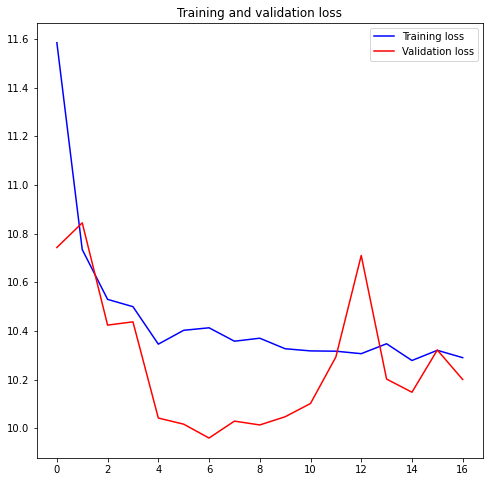

"\nplt.plot(accuracy, 'b', label='Training accuracy')\nplt.plot(val_accuracy, 'r', label='Validation accuracys')\nplt.title('Training and validation accuracy')\nplt.legend()\nplt.show()\n"

In [129]:
loss = model_result.history['loss']
val_loss = model_result.history['val_loss']

accuracy = model_result.history['accuracy']
val_accuracy = model_result.history['val_accuracy']


plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

'''
plt.plot(accuracy, 'b', label='Training accuracy')
plt.plot(val_accuracy, 'r', label='Validation accuracys')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
'''

In [53]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 255)               4080      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                3840      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,057
Trainable params: 8,057
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
# Model history
# model.history

### Evaluate model round

In [91]:
###### Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_val, y_val, batch_size=14)
print("test loss, test acc:", results)

Evaluate on test data
476/476 [==============================] - 1s 1ms/step - loss: 10.2001 - accuracy: 0.0804
test loss, test acc: [10.200084686279297, 0.08043217658996582]


In [92]:
# Try generate predictions for ensure the model is ready
# And manually check some predictions
print("Generate predictions for X_val (the validation set)")
predictions = model.predict(X_val)
print("predictions shape:", predictions.shape)

Generate predictions for X_val (the validation set)
predictions shape: (6664, 1)


In [93]:
# Manually check some predictions
print(predictions)

[[5.4137115]
 [5.1433463]
 [4.4164114]
 ...
 [5.966576 ]
 [6.4981356]
 [6.935913 ]]


In [94]:
# Manually check some predictions
print(len(predictions))
prediction = pd.DataFrame(predictions)
prediction.to_csv('val.csv')

6664


In [95]:
# Manually check some predictions
df_H_Pred=pd.DataFrame(predictions[-12:])
df_H_Pred.columns = ['Pred']
#df_H_Pred

In [96]:
# Manually check some predictions. Added horse number for easy checking
df_H_Pred.insert(loc=0, column='Horse_no', value=np.arange(len(df_H_Pred))+1)

In [98]:
# Manually check some predictions
df_H_Pred.sort_values(by='Pred', inplace=True)


In [99]:
# Manually check some predictions
df_H_Pred.insert(loc=0, column='Pred_Position', value=np.arange(len(df_H_Pred))+1)

In [101]:
df_H_Pred[['Horse_no', 'Pred_Position']].sort_values(by='Horse_no')

,Horse_no,Pred_Position
0,1,1
1,2,2
2,3,3
3,4,8
4,5,10
5,6,4
6,7,12
7,8,11
8,9,6
9,10,5


### Export model 

In [104]:
# Store the model to folder
tf.keras.models.save_model(model, "Horse_Results" )

INFO:tensorflow:Assets written to: Horse_Results/assets
